# MSDS 430 Module 7 Python Assignment 

## Data dictionaries and an introduction to text analytics

Objectives:
- learn about dictionaries and dictionary methods
- use a JSON file
- more about string methods
- regular expresssions - re Module
- Counter module 
- introduction to text analytics and natural language processing (NLP)


<div class="alert alert-block alert-warning"> In this assignment you will complete the following exercises and submit your <b>notebook</b> and <b>html file</b> to Canvas. Your files should include all output, i.e. run each cell and save your file before submitting.</div>

<div class="alert alert-block alert-info">In this exercise you will work with TripAdvisor customer review data for the <b> Best Western Plus Pioneer Square Hotel Downtown Hotel</b> in Seattle, Washington. The data is stored in a JSON file. JSON is a popular language-independent data format derived from JavaScript. In fact, JSON stands for JavaScript Object Notation. The load method in the json module in Python can be used to parse a JSON file with result being a Python dictionary. Then by using dictionary methods we can extract the list of reviews for the hotel and then use String methods to get information from within the comments made by the users.</div>

In [1]:
# If you never installed TextBlob before you need to run this cell
!pip install TextBlob

### Import all the modules we are going to need

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
from numpy import mean   

import nltk
from nltk.corpus import stopwords
from nltk import bigrams
from textblob import TextBlob

# set up notebook to display multiple outputs in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Dictionaries and Dict Methods

The hotel data we want to analyze is contained in the (json) file `hotel_reviews.json`. The data includes some information about the hotel, and a number of hotel reviews made by people who (we assume) stayed there. When we read the data into Python we will end up with a "nested" dictionary, i.e. a dictionary some of whose values are also (lists of) dictionaries. Before we examine the structure of this nested dictionary we need to talk a bit about dictionaries in general.

Dictionaries in Python are data structures that store key/value pairs. The keys have to be of an "immutable" type (such as numbers or strings) but the values can be various kinds of things, including lists, arrays, and other dictionaries. The keys need also to be unique: there can't be duplicates. Let us look at some examples.

In [5]:
# A dictionary with different types of keys: 1, "two" and (1,2). 
# Here (1,2) is an example of a tuple.
mixed_keys_dict = {1:"one", "two":2, (1,2):"ordered pair" }
mixed_keys_dict

{1: 'one', 'two': 2, (1, 2): 'ordered pair'}

In [6]:
#  Let us define a simple dictionary with String keys: "name", "age" and "sex":
cust_dict = {"name":"John Doe","age": 32, "sex": "M"}
cust_dict

{'name': 'John Doe', 'age': 32, 'sex': 'M'}

The list of keys in a dictionary can be obtained by using the dictionary's `keys` method. Also, we can obtain the value of any key in the dictionary by "bracketing" the key. We could then use assignment to change the value of the key if we wished. For more on this, see __[Dictionary View Objects](https://docs.python.org/3/library/stdtypes.html#dictionary-view-objects)__

In [7]:
# Get the list of keys--actually a dict_keys object (views) in Python 3.x.
cust_dict.keys()

dict_keys(['name', 'age', 'sex'])

In [8]:
# Get the value associated with the "name" key
cust_dict["name"]

'John Doe'

In [9]:
# Change the value of the "name" key
cust_dict["name"] = "John Doe Jr."

In [10]:
cust_dict

{'name': 'John Doe Jr.', 'age': 32, 'sex': 'M'}

In [11]:
# A better way...
cust_dict.get("height", "missing")

'missing'

In [12]:
# If the key is there it will return its value...
cust_dict.get("name", "missing")

'John Doe Jr.'

We can also use assignment to add new key/value pairs to the dictionary. 

In [13]:
cust_dict['height'] = 6.0
cust_dict['weight'] = 200.5
cust_dict

{'name': 'John Doe Jr.', 'age': 32, 'sex': 'M', 'height': 6.0, 'weight': 200.5}

Note that we need to add **key/value pairs** to an *existing* dictionary even if the dictionary is empty to begin with...

In [14]:
market_dict = {}  # create an empty dictionary
market_dict['market_name'] = 'Foods R Us'
market_dict

{'market_name': 'Foods R Us'}

Another __[dictionary method](https://www.w3schools.com/python/python_ref_dictionary.asp)__ that is used to add/modify key/value pairs is the __[update](https://www.w3schools.com/python/ref_dictionary_update.asp)__ dictionary method.

In [15]:
market_dict.update({'market_address': '123 Main Street', 'market_phone': '(212)555-6789'})
market_dict

{'market_name': 'Foods R Us',
 'market_address': '123 Main Street',
 'market_phone': '(212)555-6789'}

Let us add a new key/value pair to `cust_dict`, where the key is `"location"` and the value of that key is another dictionary (with keys: `"city"`, `"state"` and `"zip code"`).

In [16]:
# Example of a nested dictionary...
location_dict = {"city":"Miami","state":"FL","zip code":33165}
cust_dict["location"]=location_dict
cust_dict

{'name': 'John Doe Jr.',
 'age': 32,
 'sex': 'M',
 'height': 6.0,
 'weight': 200.5,
 'location': {'city': 'Miami', 'state': 'FL', 'zip code': 33165}}

Note that the value of the `"location"` key is itself a dictionary and we can access its value by "bracketing" again.

In [17]:
cust_dict['location']

{'city': 'Miami', 'state': 'FL', 'zip code': 33165}

In [18]:
cust_dict['location']['city']

'Miami'

In [19]:
cust_dict['location']['zip code']

33165

<div class="alert alert-block alert-success"><b>Problem 1 (1 pt.)</b>: Add a key/value pair to the <b><i>market_dict</i></b> dictionary defined above. We want the key to be "<b><i>fruits</i></b>" and its corresponding value to be an "inventory" dictionary. This "inventory" dictionary should consist of fruit names as keys (i.e. <b><i>apples</i></b>, <b><i>oranges</i></b> and <b><i>pears</i></b>). The value of each key should be the number of such fruits being sold at the market. Assume that there are 123 apples, 98 oranges and 53 pears on sale. After adding this key/value pair to <b><i>market_dict</i></b>, display <b><i>market_dict["fruits"]</i></b> to verify your work.</div>

In [67]:
fruit_dict = {"apples":123,"oranges":98,"pears":53}
# TODO: Add a key/value pair to the dictionary where the key is "fruits" and the value fruit_dict
market_dict["fruits"] = fruit_dict

# The following should display the three keys: 'apples', 'oranges' and 'pears'.
print(market_dict['fruits'].keys())

dict_keys(['apples', 'oranges', 'pears'])


### Examining a JSON File

Now it is time to turn our attention to our JSON file. We want to open and read `hotel_reviews.json` and save the data as a Python dictionary to the variable `hotel_data`. This is a two step process:

 1. Use the open method to create a file object.
 2. Pass the file object to `load` method in the `json` module. This method parses the contents of the file and returns a Python dictionary.
 
 But first we need to import the json module.

In [21]:
import json
#with open('../Data Files/hotel_reviews.json') as json_data:
with open('hotel_reviews.json') as json_data:
    hotel_data = json.load(json_data,) 
hotel_data

{'Reviews': [{'Ratings': {'Service': '4',
    'Cleanliness': '5',
    'Overall': '5.0',
    'Value': '4',
    'Sleep Quality': '4',
    'Rooms': '5',
    'Location': '5'},
   'AuthorLocation': 'Boston',
   'Title': '“Excellent Hotel & Location”',
   'Author': 'gowharr32',
   'ReviewID': 'UR126946257',
   'Content': 'We enjoyed the Best Western Pioneer Square. My husband and I had a room with a king bed and it was clean, quiet, and attractive. Our sons were in a room with twin beds. Their room was in the corner on the main street and they said it was a little noisier and the neon light shone in. But later hotels on the trip made them appreciate this one more. We loved the old wood center staircase. Breakfast was included and everyone was happy with waffles, toast, cereal, and an egg meal. Location was great. We could walk to shops and restaurants as well as transportation. Pike Market was a reasonable walk. We enjoyed the nearby Gold Rush Museum. Very, very happy with our stay. Staff wa

The structure of `hotel_data` is a bit complicated but it is divided into two parts: a **HotelInfo** "section" (i.e. the value of the `'HotelInfo'` key) and the **Reviews** "section" (the value of the `'Reviews'` key).

In [22]:
hotel_data.keys()

dict_keys(['Reviews', 'HotelInfo'])

In [23]:
# The hotel information is stored in a dictionary.
hotel_info = hotel_data['HotelInfo']
hotel_info

{'Name': 'BEST WESTERN PLUS Pioneer Square Hotel',
 'HotelURL': '/ShowUserReviews-g60878-d72572-Reviews-BEST_WESTERN_PLUS_Pioneer_Square_Hotel-Seattle_Washington.html',
 'Price': '$117 - $189*',
 'Address': '<address class="addressReset"> <span rel="v:address"> <span dir="ltr"><span class="street-address" property="v:street-address">77 Yesler Way</span>, <span class="locality"><span property="v:locality">Seattle</span>, <span property="v:region">WA</span> <span property="v:postal-code">98104-2530</span></span> </span> </span> </address>',
 'HotelID': '72572',
 'ImgURL': 'http://media-cdn.tripadvisor.com/media/ProviderThumbnails/dirs/51/f5/51f5d5761c9d693626e59f8178be15442large.jpg'}

In [24]:
# The list of reviews with the data for each review also being stored in a dictionary.
# Here are the first two reviews (dictionaries) in the list...
hotel_data['Reviews'][:2]

[{'Ratings': {'Service': '4',
   'Cleanliness': '5',
   'Overall': '5.0',
   'Value': '4',
   'Sleep Quality': '4',
   'Rooms': '5',
   'Location': '5'},
  'AuthorLocation': 'Boston',
  'Title': '“Excellent Hotel & Location”',
  'Author': 'gowharr32',
  'ReviewID': 'UR126946257',
  'Content': 'We enjoyed the Best Western Pioneer Square. My husband and I had a room with a king bed and it was clean, quiet, and attractive. Our sons were in a room with twin beds. Their room was in the corner on the main street and they said it was a little noisier and the neon light shone in. But later hotels on the trip made them appreciate this one more. We loved the old wood center staircase. Breakfast was included and everyone was happy with waffles, toast, cereal, and an egg meal. Location was great. We could walk to shops and restaurants as well as transportation. Pike Market was a reasonable walk. We enjoyed the nearby Gold Rush Museum. Very, very happy with our stay. Staff was helpful and knowledge

The hotel information is stored in a dictionary (with keys such as `'HotelID'` and `'Address'`), while the reviews are stored in a list--a list of dictionaries, with each dictionary containing information about a particular review. Let us get the list of reviews and save them to the `reviews` variable for further analysis.

In [25]:
reviews = hotel_data['Reviews'] # list of reviews
type(reviews) # check that it is a list

list

In [26]:
print("There are",len(reviews),"reviews altogether.")

There are 233 reviews altogether.


In [27]:
# display first review
first_review = reviews[0] 
first_review

{'Ratings': {'Service': '4',
  'Cleanliness': '5',
  'Overall': '5.0',
  'Value': '4',
  'Sleep Quality': '4',
  'Rooms': '5',
  'Location': '5'},
 'AuthorLocation': 'Boston',
 'Title': '“Excellent Hotel & Location”',
 'Author': 'gowharr32',
 'ReviewID': 'UR126946257',
 'Content': 'We enjoyed the Best Western Pioneer Square. My husband and I had a room with a king bed and it was clean, quiet, and attractive. Our sons were in a room with twin beds. Their room was in the corner on the main street and they said it was a little noisier and the neon light shone in. But later hotels on the trip made them appreciate this one more. We loved the old wood center staircase. Breakfast was included and everyone was happy with waffles, toast, cereal, and an egg meal. Location was great. We could walk to shops and restaurants as well as transportation. Pike Market was a reasonable walk. We enjoyed the nearby Gold Rush Museum. Very, very happy with our stay. Staff was helpful and knowledgeable.',
 'Da

In [28]:
# display first review's ratings only
first_review_ratings = first_review['Ratings']
first_review_ratings

{'Service': '4',
 'Cleanliness': '5',
 'Overall': '5.0',
 'Value': '4',
 'Sleep Quality': '4',
 'Rooms': '5',
 'Location': '5'}

In [29]:
print(first_review['Author'],"made the following comments:",'\n')
print(first_review['Content'])

gowharr32 made the following comments: 

We enjoyed the Best Western Pioneer Square. My husband and I had a room with a king bed and it was clean, quiet, and attractive. Our sons were in a room with twin beds. Their room was in the corner on the main street and they said it was a little noisier and the neon light shone in. But later hotels on the trip made them appreciate this one more. We loved the old wood center staircase. Breakfast was included and everyone was happy with waffles, toast, cereal, and an egg meal. Location was great. We could walk to shops and restaurants as well as transportation. Pike Market was a reasonable walk. We enjoyed the nearby Gold Rush Museum. Very, very happy with our stay. Staff was helpful and knowledgeable.


### Creating a List

We want to create a list with just the comments (strings). We do this by iterating over the list of reviews...

In [30]:
comment_lst = []  # will contain the review strings
for review in reviews:
    comment_lst.append(review['Content'])

In [31]:
len(comment_lst) # contains 233 comments--one for each reviewer

233

In [32]:
first_comment=comment_lst[0]
print("The first comment in the comment list is:",'\n')
print(first_comment)

The first comment in the comment list is: 

We enjoyed the Best Western Pioneer Square. My husband and I had a room with a king bed and it was clean, quiet, and attractive. Our sons were in a room with twin beds. Their room was in the corner on the main street and they said it was a little noisier and the neon light shone in. But later hotels on the trip made them appreciate this one more. We loved the old wood center staircase. Breakfast was included and everyone was happy with waffles, toast, cereal, and an egg meal. Location was great. We could walk to shops and restaurants as well as transportation. Pike Market was a reasonable walk. We enjoyed the nearby Gold Rush Museum. Very, very happy with our stay. Staff was helpful and knowledgeable.


### String Methods

We we want to iterate over the list of comments and obtain information about the comments made by the reviewers. Since each of the comments is a String object, we are going to need some String methods to extract the information. See, for example, __[String Methods](https://www.w3schools.com/python/python_ref_string.asp)__. Let us illustrate some of the listed methods with the comments from the first reviewer.

In [33]:
# Create a new string with all characters made lower case..
first_comment.lower()

'we enjoyed the best western pioneer square. my husband and i had a room with a king bed and it was clean, quiet, and attractive. our sons were in a room with twin beds. their room was in the corner on the main street and they said it was a little noisier and the neon light shone in. but later hotels on the trip made them appreciate this one more. we loved the old wood center staircase. breakfast was included and everyone was happy with waffles, toast, cereal, and an egg meal. location was great. we could walk to shops and restaurants as well as transportation. pike market was a reasonable walk. we enjoyed the nearby gold rush museum. very, very happy with our stay. staff was helpful and knowledgeable.'

In [34]:
# Find how many times the string "we" is mentioned in the comments.
first_comment.count("we")

2

In [35]:
# If we wanted a "case-insensitive" search of instances of "we", we can do this...
first_comment.lower().count("we")  # include "We" as well

7

<div class="alert alert-block alert-success"><b>Problem 2 (2 pts.)</b>: Complete the loop below to display the number of times "bathroom" is contained within the text of the reviews for this hotel. Your output should look like this:</div>

`The word 'bathroom' occurs 29 times in the reviews for this hotel.`

In [68]:
counter = 0
for review in comment_lst:
    

    # TODO: Insert code in the for loop body to determine the number of times "bathroom" appears 
    # in the current review and increment the counter variable accordingly.
    counter += review.lower().count("bathroom")
        
# TODO: Print using an f-string
print(f'The word "bathroom" occurs {counter} times in the reviews for this hotel.')
 

The word "bathroom" occurs 29 times in the reviews for this hotel.


<div class="alert alert-block alert-success"><b>Problem 3 (2 pts.)</b>: Print the number of "wordy" comments. A comment is considered "wordy" if it contains more than 100 words. For example, "We stayed here and we liked it" contains 7 words. Your output should look like this:</div>

`There are 128 wordy comments.`

In [69]:
counter = 0
for review in comment_lst:
    # TODO: Insert code in the for loop body to get the number of "wordy" comments.
    if len(review.split()) > 100:
        counter += 1
   

##Print the number of wordy comments.
print(f'There are {counter} wordy comments.')

There are 128 wordy comments.


We want to iterate over the `reviews` dictionary again this time saving with name of the reviewer together with the comments (in a dictionary).

<div class="alert alert-block alert-success"><b>Problem 4 (4 pts.)</b>: Create a list of dictionaries (<b><i>ar_dict</i></b>), where each dictionary has two keys: "<b><i>Author</i></b>" and "<b><i>Comments</i></b>", by iterating over the list of reviews and for each review constructing a dictionary containing the author's name and comments and then appending it to the list of dictionaries we are creating.</div>

In [70]:
ar_lst = []
for review in reviews:
    # TODO: (1) Create a dictionary, ar_dict, containing just two keys, “Author” and "Comments”. 
    #           Their values should be obtained from the current review dictionary stored in the “review” variable.
    ar_dict = {
    "Author": review["Author"],
    "Content": review["Content"]}
    #       (2) Append this newly constructed dictionary, ar_dict, to the ar_lst list.
    ar_lst.append(ar_dict)
# Let us check that we have 233 elements in the ar_lst list.
print(f'There are {len(ar_lst)} elements in the list.')


There are 233 elements in the list.


In [71]:
# Let us display the data from the first dictionary in the list.

first_review = ar_lst[0]
print(f"{first_review['Author']}, said this",'\n')
#print(first_review['Author'],"said this:",'\n')
print(first_review['Content'])

gowharr32, said this 

We enjoyed the Best Western Pioneer Square. My husband and I had a room with a king bed and it was clean, quiet, and attractive. Our sons were in a room with twin beds. Their room was in the corner on the main street and they said it was a little noisier and the neon light shone in. But later hotels on the trip made them appreciate this one more. We loved the old wood center staircase. Breakfast was included and everyone was happy with waffles, toast, cereal, and an egg meal. Location was great. We could walk to shops and restaurants as well as transportation. Pike Market was a reasonable walk. We enjoyed the nearby Gold Rush Museum. Very, very happy with our stay. Staff was helpful and knowledgeable.


### The Counter Module

In the next exercise we want to count the number of *unique* words in each of the comments. We learned previously how to split a string to create a list of words. We can write code from scratch to count the number of different words in the list. Alternatively, we can convert the list to another container data type that makes it easier to obtain this information. The `counter` module defines the `Counter` class. A `Counter` is basically a "special type" of dictionary. Given a list object `my_list` we can turn it into a counter object as follows: `Counter(my_list)`. This assumes we already imported the class from the collections module: `from collections import Counter`. See __[Counter Module](http://rahmonov.me/posts/python-collections-counter/)__. 

For example,

```python
from collections import Counter
my_list = ['a', 'b', 'c', 'c', 'a', 'd', 'b', 'e', 'a']
Counter(my_list)
```
creates the Counter object:

```python
Counter({'a': 3, 'b': 2, 'c': 2, 'd': 1, 'e': 1})
```

This tells you that the letter `a` appears `3` times in the list, etc.

We can get the keys and values just like with dictionaries:

```python
list(Counter(my_list).keys())
```

returns

```python
['a', 'b', 'c', 'd', 'e']
```

and

```python
list(Counter(my_list).values())
```

returns

```python
[3, 2, 2, 1, 1]
```

### Regular Expressions - The *re* Module

Regular expressions or regexes are a specialized programming language embedded inside Python and made available through the `re` module. Using *re* module functions, you specify the rules for the set of possible strings that you want to match. You can follow this up with questions such as “Does this string match the pattern?”, or “Is there a match for the pattern anywhere in this string?”. You can also use regexes (or REs) to modify a string or to split it apart in various ways.

Reference: __[Regex How-to](https://docs.python.org/3.7/howto/regex.html#regex-howto)__

In our specific example, we want to get the list of words in each review. The first step towards this goal is to remove punctuation from the comment strings. There is top-level function `sub` in the `re` module that can be used to replace characters in a string by other characters (or remove them altogether).

In [40]:
import re

phone = "2004-959-559 # This is Phone Number"

# Delete Python-style comments
num = re.sub(r'#.*$', "", phone)
print("Phone Num : ", num)

# Remove anything other than digits
num = re.sub(r'\D', "", phone)    
print("Phone Num : ", num)

Phone Num :  2004-959-559 
Phone Num :  2004959559


For more examples on regular expressions, please visit: <br>__[Regular Expressions](https://www.tutorialspoint.com/python/python_reg_expressions.htm)__

For a list of punctuation options in the string class, please visit:<br>
__[String Punctuation](https://www.geeksforgeeks.org/string-punctuation-in-python/)__

In [41]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

<div class="alert alert-block alert-success"><b>Problem 5 (4 pts.)</b>: Iterate over <b><i>ar_list</i></b> and print the name of each reviewer (author) and the total number of *different*, i.e. *unique*, words in his comments. For example, "We stayed here and we liked it" contains 6 *unique* words since 'we' is repeated 2 times.

As part of the process of counting *unique* words in each comment string you want to first remove all punctuation using `re.sub`. Save the resulting string to a list: `comments`. </b> 
    
</div>

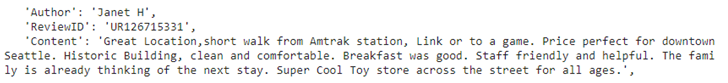

In [72]:
counter = 0
from collections import Counter
import re
comments = []
comments_by_author = {}
i = 0

for review in ar_lst:
    # TODO: (1) Get the number of words in the current review variable.
    author = review['Author']
    content = review['Content']
    content_cleaned = re.sub(r'[^\w\s]'," ",content)
    comments.append(content_cleaned)
    unique_words = set([token.lower() for token in content_cleaned.split()])
    
    if author in comments_by_author:
        comments_by_author[author] = comments_by_author[author].union(unique_words)
    else:
        comments_by_author[author] = unique_words
        
    
    
    
    #       (2) Print the author's name and the number of (unique) words in his/her review   
for author, unique_words in comments_by_author.items():

    
    print(f"{author} used {len(unique_words)} unique words.")


gowharr32 used 87 unique words.
Nancy W used 84 unique words.
Janet H used 44 unique words.
TimothyFlorida used 68 unique words.
KarenArmstrong_BC used 106 unique words.
Shane33333 used 52 unique words.
Bnkruzn used 15 unique words.
Teacherbear used 54 unique words.
CandyGnomad used 50 unique words.
idahosandy used 16 unique words.
CW2S used 145 unique words.
jimmy62_11 used 78 unique words.
BoulderIllini used 129 unique words.
funlovingdad used 104 unique words.
suntraveler222 used 205 unique words.
rosariodurao used 39 unique words.
Jody R used 87 unique words.
Tasha M used 27 unique words.
Roy C used 88 unique words.
MikeGB2 used 107 unique words.
Jennie S used 54 unique words.
mcdonothing used 80 unique words.
SWanjiru used 108 unique words.
trish0 used 50 unique words.
txlnstr used 25 unique words.
mydogisfat used 46 unique words.
DaddyHoward used 96 unique words.
BCisBeautiful used 120 unique words.
wildorchid416 used 174 unique words.
JCPCG used 82 unique words.
quilter1975 used

##### Sample Output

## Analyzing the Review text

The next step in analyzing the data is to look for insights within the reviews given by the customers. We will start by looking at the most common words and then analyzing the sentiments of the reviews - whether they are positive or negative.

In [45]:
# start with the list of Reviews which is in a free text format 
type(comments)
len(comments) # Number of comments
comments[:3] # display the first three comments in the list

list

233

['We enjoyed the Best Western Pioneer Square  My husband and I had a room with a king bed and it was clean  quiet  and attractive  Our sons were in a room with twin beds  Their room was in the corner on the main street and they said it was a little noisier and the neon light shone in  But later hotels on the trip made them appreciate this one more  We loved the old wood center staircase  Breakfast was included and everyone was happy with waffles  toast  cereal  and an egg meal  Location was great  We could walk to shops and restaurants as well as transportation  Pike Market was a reasonable walk  We enjoyed the nearby Gold Rush Museum  Very  very happy with our stay  Staff was helpful and knowledgeable ',
 'Great visit to Seattle thanks to our stay at the Best Western Pioneer Square  The hotel was reasonably priced and close to everything we wanted to see   ferry ride  Underground Tour  Klondike Museum  short walk to Pike Market and other shopping  The staff was amazingly helpful and a

## Tokenize - or split into words

The `comments` list has already been cleaned with lower case and all punctuation removed. But the cell below shows the combined use of `.lower` to normalize the case of the data and `.split` to use the white space of the sentences to establish words (tokens).

In [46]:
print(comments[1])

Great visit to Seattle thanks to our stay at the Best Western Pioneer Square  The hotel was reasonably priced and close to everything we wanted to see   ferry ride  Underground Tour  Klondike Museum  short walk to Pike Market and other shopping  The staff was amazingly helpful and accommodating  Our room was very clean and had everything we needed  Breakfast was plentiful and very good  Before we booked  I read about some potential issues with the area  I can honestly say that the area was just fine  In fact  if you enjoy historic and quaint parts of town  this is definitely where you want to stay  I will be recommending this hotel to anyone who is headed to Seattle 


In [47]:
# break out the Reviews into words
##words = [content.values() for content in comments]
##print(words)

my_words = [line.lower().split() for line in comments]


# display the first 10 words in the first 5 comments
for words in my_words[:5]:
    
    print(words[:10])

['we', 'enjoyed', 'the', 'best', 'western', 'pioneer', 'square', 'my', 'husband', 'and']
['great', 'visit', 'to', 'seattle', 'thanks', 'to', 'our', 'stay', 'at', 'the']
['great', 'location', 'short', 'walk', 'from', 'amtrak', 'station', 'link', 'or', 'to']
['accommodation', 'in', 'seattle', 'can', 'be', 'expensive', 'this', 'hotel', 'is', 'very']
['very', 'cool', 'old', 'building', 'in', 'a', 'great', 'location', 'check', 'in']


### Itertools - a standard python package that allows for iterating instead of looping

 * https://jmduke.com/2013/11/29/itertools
 * https://realpython.com/python-itertools/

In [48]:
# prepare the words for analysis
words_total = list(itertools.chain(*my_words))

type(words_total)
words_total[:20] # display the first 20 words in the comments


list

['we',
 'enjoyed',
 'the',
 'best',
 'western',
 'pioneer',
 'square',
 'my',
 'husband',
 'and',
 'i',
 'had',
 'a',
 'room',
 'with',
 'a',
 'king',
 'bed',
 'and',
 'it']

### Most common words

When you look at the most common words, you see words that are not unique to hotel reviews, but are common to any topic like <i><u> the, and, a, to.</u></i> In Natural Language Processing, these are called <b>stopwords</b>.

In [49]:
# You can see the most common words are what would qualify as stopwords
# These stopwords have no value in our analysis and only provide noise
count_words = collections.Counter(words_total)
count_words.most_common(20)

[('the', 2108),
 ('and', 1194),
 ('a', 893),
 ('to', 864),
 ('was', 682),
 ('of', 505),
 ('hotel', 504),
 ('we', 497),
 ('is', 468),
 ('in', 462),
 ('i', 426),
 ('for', 359),
 ('it', 323),
 ('very', 280),
 ('this', 260),
 ('room', 256),
 ('with', 254),
 ('at', 229),
 ('were', 224),
 ('you', 208)]

### Stopwords

The <b>nltk</b> package comes with default stopwords.

In [50]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# comes with 179 stopwords
len(stop_words)
stop_words

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nikhil/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

179

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

### Remove stopwords

The code in the next cell will remove the stopwords from your list.

In [51]:
my_final = [[word for word in count_words if not word in stop_words]
              for count_words in my_words]
my_final

[['enjoyed',
  'best',
  'western',
  'pioneer',
  'square',
  'husband',
  'room',
  'king',
  'bed',
  'clean',
  'quiet',
  'attractive',
  'sons',
  'room',
  'twin',
  'beds',
  'room',
  'corner',
  'main',
  'street',
  'said',
  'little',
  'noisier',
  'neon',
  'light',
  'shone',
  'later',
  'hotels',
  'trip',
  'made',
  'appreciate',
  'one',
  'loved',
  'old',
  'wood',
  'center',
  'staircase',
  'breakfast',
  'included',
  'everyone',
  'happy',
  'waffles',
  'toast',
  'cereal',
  'egg',
  'meal',
  'location',
  'great',
  'could',
  'walk',
  'shops',
  'restaurants',
  'well',
  'transportation',
  'pike',
  'market',
  'reasonable',
  'walk',
  'enjoyed',
  'nearby',
  'gold',
  'rush',
  'museum',
  'happy',
  'stay',
  'staff',
  'helpful',
  'knowledgeable'],
 ['great',
  'visit',
  'seattle',
  'thanks',
  'stay',
  'best',
  'western',
  'pioneer',
  'square',
  'hotel',
  'reasonably',
  'priced',
  'close',
  'everything',
  'wanted',
  'see',
  'ferry

In [52]:
all_words = list(itertools.chain(*my_final))
counts_all = collections.Counter(all_words)
counts_all.most_common(20)

[('hotel', 504),
 ('room', 256),
 ('seattle', 203),
 ('staff', 173),
 ('great', 167),
 ('breakfast', 160),
 ('pioneer', 152),
 ('square', 149),
 ('stay', 140),
 ('location', 112),
 ('good', 105),
 ('clean', 104),
 ('best', 99),
 ('friendly', 94),
 ('would', 92),
 ('free', 91),
 ('walk', 90),
 ('helpful', 90),
 ('us', 89),
 ('one', 87)]

Let's take a look of the results of removing the stopwords.  You can see (in the cell above) words common to our topic appearing at the top of the list. <br>

Does the word 'hotel' add anything to our analysis?  Probably not since we are dealing with hotel reviews. Cleaning text for analysis is very topic specific and requires that you either include discussion with a subject matter expert or spend time with the data to discover the words common to the topic; in our case it is words like `hotel` and `room`. Let's remove these words that will not add to our analysis.  Below is sample code showing how to add to the out-of-the-box stopwords.

In [53]:
len(stop_words)

type(stop_words)

# add in common words that you don't want in analysis
my_stop = ['hotel','room']

stop_words.update(my_stop)

len(stop_words)

179

set

181

<div class="alert alert-block alert-success"><b>Problem 6 (6 pts.)</b>:  
    
Looking at the most common words, which words will not add to the analysis?<br>

1. Add 'pioneer' and 'seattle' to the stopword list. Show the len of `stop_words` before and after you add the stopwords.
2. Apply your new stopword list to the review list.
3. Show the most common 20 words

</div>

In [73]:
#TODO: Show the length of stop_words before adding 'pioneer' and 'seattle' to the stopword list
len(stop_words)

type(stop_words)

#TODO: Add 'pioneer' and 'seattle' to the stopword list
my_stop = ['pioneer','seattle']
stop_words.update(my_stop)

#TODO: Show the length of 'stop_words' after the change
len(stop_words)


183

set

183

In [74]:
#TODO: Apply stopwords to the Review list
hotel_data = [[token for token in review if token not in stop_words] for review in my_words]
print(hotel_data)

[['enjoyed', 'best', 'western', 'square', 'husband', 'king', 'bed', 'clean', 'quiet', 'attractive', 'sons', 'twin', 'beds', 'corner', 'main', 'street', 'said', 'little', 'noisier', 'neon', 'light', 'shone', 'later', 'hotels', 'trip', 'made', 'appreciate', 'one', 'loved', 'old', 'wood', 'center', 'staircase', 'breakfast', 'included', 'everyone', 'happy', 'waffles', 'toast', 'cereal', 'egg', 'meal', 'location', 'great', 'could', 'walk', 'shops', 'restaurants', 'well', 'transportation', 'pike', 'market', 'reasonable', 'walk', 'enjoyed', 'nearby', 'gold', 'rush', 'museum', 'happy', 'stay', 'staff', 'helpful', 'knowledgeable'], ['great', 'visit', 'thanks', 'stay', 'best', 'western', 'square', 'reasonably', 'priced', 'close', 'everything', 'wanted', 'see', 'ferry', 'ride', 'underground', 'tour', 'klondike', 'museum', 'short', 'walk', 'pike', 'market', 'shopping', 'staff', 'amazingly', 'helpful', 'accommodating', 'clean', 'everything', 'needed', 'breakfast', 'plentiful', 'good', 'booked', 're

In [75]:
#TODO: Show the most common 20 words
all_words = list(itertools.chain(*hotel_data))
counts_all = collections.Counter(all_words)
counts_all.most_common(20)

[('staff', 173),
 ('great', 167),
 ('breakfast', 160),
 ('square', 149),
 ('stay', 140),
 ('location', 112),
 ('good', 105),
 ('clean', 104),
 ('best', 99),
 ('friendly', 94),
 ('would', 92),
 ('free', 91),
 ('walk', 90),
 ('helpful', 90),
 ('us', 89),
 ('one', 87),
 ('night', 86),
 ('nice', 86),
 ('rooms', 85),
 ('area', 83)]

We can create a horizontal bar graph displaying the counts for each of the common words to view the results for common words.

<AxesSubplot:ylabel='words'>

Text(0.5, 1.0, 'Common Words Found in Comments (Without Stop Words)')

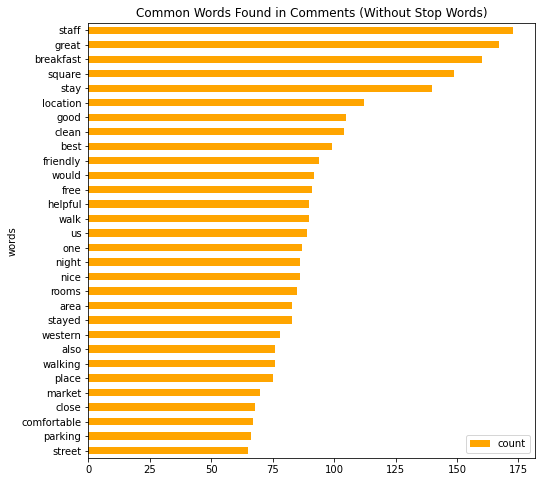

In [57]:
clean_words = pd.DataFrame(counts_all.most_common(30),
                             columns=['words', 'count'])
#clean_words

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_words.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="orange")

ax.set_title("Common Words Found in Comments (Without Stop Words)")

plt.show()

### Isolate reviews with specific words that you want to analyze

The example below is selecting only reviews with the word <b>'staff'</b>

In [58]:
select_comments = []
for comment in comments:
    temp = comment.lower()
    if 'staff' in temp:
        select_comments.append(temp)

len(select_comments)
select_comments
     

145

['we enjoyed the best western pioneer square  my husband and i had a room with a king bed and it was clean  quiet  and attractive  our sons were in a room with twin beds  their room was in the corner on the main street and they said it was a little noisier and the neon light shone in  but later hotels on the trip made them appreciate this one more  we loved the old wood center staircase  breakfast was included and everyone was happy with waffles  toast  cereal  and an egg meal  location was great  we could walk to shops and restaurants as well as transportation  pike market was a reasonable walk  we enjoyed the nearby gold rush museum  very  very happy with our stay  staff was helpful and knowledgeable ',
 'great visit to seattle thanks to our stay at the best western pioneer square  the hotel was reasonably priced and close to everything we wanted to see   ferry ride  underground tour  klondike museum  short walk to pike market and other shopping  the staff was amazingly helpful and a

## Using TextBlob for sentiment analysis

__[TextBlob](https://textblob.readthedocs.io/en/dev/)__

### Sentiment Analysis

Sentiment property returns values of polarity and subjectivity.  The polarity score is a float that ranges from -1.0 to 1.0.  Typically a polarity score below -0.5 is negative, a score above 0.5 is positive and a score in between is considered neutral.

The subjectivity score is a float that ranges between 0.0 and 1.0 where the lower scores are very objective and the scores closer to 1.0 are very subjective.

In [59]:
comment_sent_pol = [TextBlob(review).sentiment.polarity for review in select_comments]
comment_sent_pol[:10]

[0.39714912280701753,
 0.34239583333333334,
 0.32708333333333334,
 0.10261111111111113,
 0.4734568903318903,
 0.31203703703703706,
 0.16383333333333336,
 0.31614583333333335,
 0.24506666666666668,
 0.1331547619047619]

In [60]:
len(comment_sent_pol)

145

Let us see how the sentiment polarity are distributed.  With `staff` being mentioned so many times, the Best Western management wants to know if the comments are more positive or negative.

(array([ 4.,  9., 18., 16., 28., 26., 18., 12., 10.,  4.]),
 array([0.00506536, 0.06407734, 0.12308932, 0.18210131, 0.24111329,
        0.30012527, 0.35913725, 0.41814924, 0.47716122, 0.5361732 ,
        0.59518519]),
 <BarContainer object of 10 artists>)

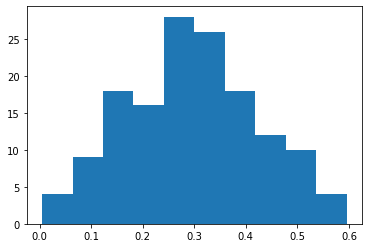

In [61]:
plt.hist(comment_sent_pol)

You can see by the histogram, which is relatively symmetric in shape, that all comments have a polarity above zero with some above 0.5. Even though there are no negative polarity scores, most lie between 0.1 and 0.5 indicating mostly neutral reviews.

<div class="alert alert-block alert-success"><b>Problem 7 (5 pts.)</b>:  
    
Isolate the comments containing at least one instance of the word <b>'comfortable'</b>. 
1. Save the comments to a list. You should have 67 comments.
2. Create a histogram to display the distribution of the average polarities. 
3. Interpret the results.

</div>

In [62]:
#TODO - create a list of comments that contain the word 'comfortable'. Make sure the comments have already
# had punctuation removed and have been put into lowercase.
comfortable = []

for comment in comments:
    temp = comment.lower()
    if 'comfortable' in temp:
        comfortable.append(temp)
        
print(len(comfortable))
    

67


[0.32708333333333334,
 0.10261111111111113,
 0.7066666666666667,
 0.1331547619047619,
 0.0050653594771241945,
 0.4299047619047619,
 0.27962012987012985,
 0.10222222222222223,
 0.20448412698412702,
 0.338]

(array([ 3.,  5., 10., 12., 17., 13.,  5.,  1.,  0.,  1.]),
 array([0.00506536, 0.07522549, 0.14538562, 0.21554575, 0.28570588,
        0.35586601, 0.42602614, 0.49618627, 0.56634641, 0.63650654,
        0.70666667]),
 <BarContainer object of 10 artists>)

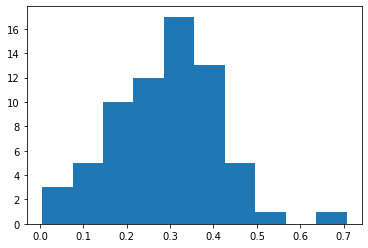

In [63]:
#TODO show a histogram of the polarity
comfortable_lst = [TextBlob(review).sentiment.polarity for review in comfortable]
comfortable_lst[:10]


plt.hist(comfortable_lst)

#TODO - Interpret the results. 
We can see the the variable comfortable contains the distribution for the word comfortable. 
It can be clearly seen that it has high frequency at around 0.3. It also has a bell shape curve. 

## Stemming - getting to the root word

Stemming will take words such as `enjoyed` and `enjoying` to the root form of `enjoy`.  A disadvantage of stemming is that it may stem a word to a non-sensical word, such as `location` to `locat`.

Reference: __[Stemming vs Lemmatization](https://www.analyticsvidhya.com/blog/2022/06/stemming-vs-lemmatization-in-nlp-must-know-differences/)__

In [64]:
# create a list of words 
to_stem = list(itertools.chain(*my_final))

# stemming section
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
stemmed = [porter.stem(word) for word in to_stem]
print(stemmed[:50])

['enjoy', 'best', 'western', 'pioneer', 'squar', 'husband', 'room', 'king', 'bed', 'clean', 'quiet', 'attract', 'son', 'room', 'twin', 'bed', 'room', 'corner', 'main', 'street', 'said', 'littl', 'noisier', 'neon', 'light', 'shone', 'later', 'hotel', 'trip', 'made', 'appreci', 'one', 'love', 'old', 'wood', 'center', 'staircas', 'breakfast', 'includ', 'everyon', 'happi', 'waffl', 'toast', 'cereal', 'egg', 'meal', 'locat', 'great', 'could', 'walk']


<div class="alert alert-block alert-success"><b>Problem 8 (6 pts.)</b>:  
    
When you look at the `stemmed` object above, you can see the results of using PorterStemmer.  But what did this do to our top words?
    
1. Write code to count the words and show the top 20 used.
2. Produce a new horizontal bar graph with this new set of words.
3. Explain what stemming did to our set of words.

</div>

In [65]:
# TODO: count the words in stemmed

# stemming section
from nltk.stem.porter import PorterStemmer
# print(words_total)
#porter = PorterStemmer()
#stemmed = [porter.stem(word) for word in words_total]
#stem_count = collections.Counter(stemmed)
#stem_count.most_common(20)


porter = PorterStemmer()
stemmed = [porter.stem(word) for word in words_total]
stem_count = collections.Counter(stemmed)
most_common_stemmed = stem_count.most_common(20)
most_common_stemmed

[('the', 2108),
 ('and', 1194),
 ('a', 893),
 ('to', 864),
 ('wa', 683),
 ('hotel', 537),
 ('of', 505),
 ('we', 497),
 ('is', 468),
 ('in', 462),
 ('i', 426),
 ('for', 359),
 ('it', 342),
 ('room', 341),
 ('veri', 280),
 ('thi', 260),
 ('with', 254),
 ('stay', 251),
 ('at', 229),
 ('were', 224)]

<Figure size 720x432 with 0 Axes>

<BarContainer object of 20 artists>

Text(0.5, 0, 'Count')

Text(0, 0.5, 'Stemmed Words')

Text(0.5, 1.0, 'Most Common Stemmed Words')

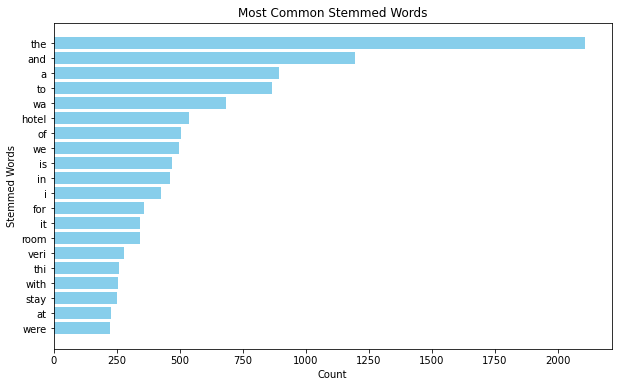

In [66]:
# TODO: create new horizontal bar chart with stemmed words
stemmed_words, counts = zip(*most_common_stemmed)

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(stemmed_words, counts, color='skyblue')
plt.xlabel('Count')
plt.ylabel('Stemmed Words')
plt.title('Most Common Stemmed Words')
plt.gca().invert_yaxis()  # Invert y-axis to show the most common words at the top
plt.show()

# TODO: Explain how the top words differ after applying stemming
After applying stemming words that for example in the past tense will take the root word,enjoyed will become enjoyed. In addition we may get a lot of words that may stem the words such as veri which could stand for verification. 

## Lemmatization

We saw the limitations with stemming where the stemmed word may not be a meaningful representation of the word - like `squar` for `square`.  Lemmatization will overcome this problem as it looks for more meaningful representation of the word by looking at the entire sentence and considering context.  The result of lemmatization will be a valid word.
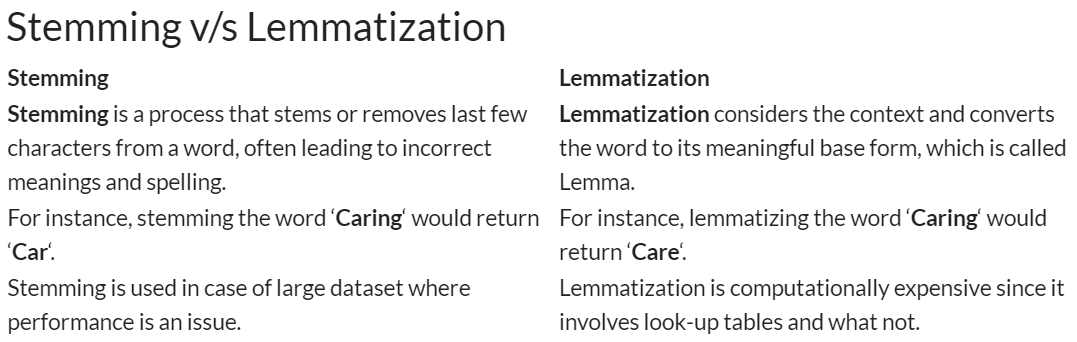

If you choose to go deeper into the programming of text analytics and NLP, you will learn more about stemming and lemmatization.  To see lemmatization code, check out: __[Stemming vs Lemmatization](https://www.analyticsvidhya.com/blog/2022/06/stemming-vs-lemmatization-in-nlp-must-know-differences/)__